# Introduction
In this tutorial we’re going to be looking at two Scottylabs API’s. Scottylabs made these APIs in order to make CMU data more accessible to students who may wish to use these for their projects. The API’s serve the data to the user in json format which makes using the data very simple. Scottylabs has two interesting API's which are the Dining API and the Course API. The Dining API provides information of all the dining locations on campus with information such as where each dining location is and what times does each location operate at. The Course API provides the user with information of all the courses that are available for CMU students to take, giving all the information that you would normally find on SIO in a nice JSON format. Sadly the Course API requires a Python 3 installation to function properly so for this tutorial we will mainly focus on the Dining API. That being said both API's provide a JSON output file so the principles should be the same.

We’re going to start off with something simple and load the Scottylabs dining API. More details about this API can be found on their website at https://scottylabs.org/dining-api/ This API is very simple to use all that is required is a simple GET request to http://apis.scottylabs.org/dining/v1/locations which provides you with the easy to use json-formatted data about CMU’s dining locations

## JSON Format
To get started we will first briefly go over the JSON format. JSON stands for JavaScript Object Notation and as its name suggests was inspired by JavaScript's object syntax. JSON uses key-value pairs in order to store data where each key is a string and each value can either be a string, number, boolean, array or even another JSON object. Because of this JSON notation is very human readable and flexible enough to allow for more complex data representations. 

In [2]:
import urllib2
import json

We're going to use urllib2 in order to load the url link contents and we're going to use the JSON library to load the JSON-formatted response string into an actual JSON object. In fact the JSON object works pretty much exactly like a python dictionary, so using the data will be very intuitive.

In [3]:
dining_data = json.load(urllib2.urlopen("http://apis.scottylabs.org/dining/v1/locations"))

However we have no idea of how the data is actually structured. Thankfully the API documentation covers this.

In [3]:
"""
{
  "locations": [{
    "name": string,
    "description": string,
    "keywords": [string],
    "location": string,
    "times": [{
      "start": {
       "day": number,
       "hour": number,
       "minute": number,
      },
      "end": {
        "day": number,
        "hour": number,
        "minute": number,
      }
    }, ...]
  }, ...]
}
"""

'\n{\n  "locations": [{\n    "name": string,\n    "description": string,\n    "keywords": [string],\n    "location": string,\n    "times": [{\n      "start": {\n       "day": number,\n       "hour": number,\n       "minute": number,\n      },\n      "end": {\n        "day": number,\n        "hour": number,\n        "minute": number,\n      }\n    }, ...]\n  }, ...]\n}\n'

What if we wanted to know just the names of the dining locations without all of the other information clogging up the screen? 

In [4]:
eatery_names = [location["name"] for location in dining_data["locations"]]

print "Total number of dining locations: ",  len(eatery_names)
for eatery in eatery_names:
    print eatery

Total number of dining locations:  39
Carnegie Mellon Cafe
El Gallo de Oro
Entropy+
The Exchange
Gingers Express
Heinz Café
La Prima Espresso
Maggie Murph Café
City Grill
Pasta Villaggio
Spinning Salads
Evgefstos
Rice Bowl
Creperie
Downtown Deli
El Burrito Grande
Global Flavour
Chef's Table
Nakama
Soup & Salad
Spice It Up Grill
Stir Crazy
Take Comfort
Taste of India
Breakfast Express
Schatz Dining Room
SEIber Café
Stephanie's
Tartan Express
The Pomegranate
Tartans Pizza
Tazza D'Oro
The Underground
The Zebra Lounge
Grill'n'Greens
Saigon Pho
Rothberg's Roasters II
Au Bon Pain
iNoodle


As you can see from above using JSON objects is pretty much exactly the same as using python dictionaries.

Now let's do something more interesting with this data. Let's say we wanted to sort the dining locations by the longest total operating hours per week. First we will have to calculate the hours using the start and end data provided by the API. We will then add the new data to each eatery under a new key called hours_open.

In [5]:

def daysElapsed(startDay, endDay):
    if endDay < startDay:
        return endDay + 7 - startDay
    return endDay - startDay

def getTotalHoursOpen(eatery):
    times = eatery['times']
    total_hours_open = 0
    for time in times:
        start_day = time['start']['day']
        start_hour = time['start']['hour']
        start_min = time['start']['min']
        end_day = time['end']['day']
        end_hour = time['end']['hour']
        end_min = time['end']['min']
        days_passed = daysElapsed(start_day, end_day)
        hours_open = end_hour+(24*days_passed) +float(end_min)/60 - (start_hour + float(start_min)/60 )
        total_hours_open += hours_open
    return total_hours_open
    

for eatery in dining_data['locations']:
    eatery['hours_open'] = getTotalHoursOpen(eatery)
    print eatery['name'] + ": " , getTotalHoursOpen(eatery)

Carnegie Mellon Cafe:  128.5
El Gallo de Oro:  80.5
Entropy+:  127.5
The Exchange:  64.5
Gingers Express:  40.0
Heinz Café:  43.5
La Prima Espresso:  48.0
Maggie Murph Café:  136.0
City Grill:  45.0
Pasta Villaggio:  45.0
Spinning Salads:  45.0
Evgefstos:  49.0
Rice Bowl:  45.0
Creperie:  25.0
Downtown Deli:  25.0
El Burrito Grande:  10.5
Global Flavour:  28.0
Chef's Table:  4.0
Nakama:  15.0
Soup & Salad:  45.5
Spice It Up Grill:  45.5
Stir Crazy:  8.0
Take Comfort:  8.0
Taste of India:  43.0
Breakfast Express:  7.0
Schatz Dining Room:  50.5
SEIber Café:  37.5
Stephanie's:  30.0
Tartan Express:  39.0
The Pomegranate:  43.5
Tartans Pizza:  72.0
Tazza D'Oro:  60.0
The Underground:  122.5
The Zebra Lounge:  45.0
Grill'n'Greens:  7.0
Saigon Pho:  10.5
Rothberg's Roasters II:  75.0
Au Bon Pain:  108.5
iNoodle:  57.5


Now that we have this data let us plot it so that we can visualize our results more clearly. To do this we are going to plot the data using a simple bar graph. We will first create two lists from our data: one list will have the sorted hours while the other list will contain the corresponding eatery names.

In [6]:
name_hours_list = [(i['name'], i['hours_open']) for i in dining_data['locations']]
name_hours_list = sorted(name_hours_list, key = lambda tup : tup[1], reverse = True)

sorted_hours = [tup[1] for tup in name_hours_list]
sorted_names = [tup[0] for tup in name_hours_list]

Now that we have the sorted data we will use matplotlib and numpy to plot the data.

In [7]:
import matplotlib.pyplot as plt
import numpy as np

/home/adi/Documents/datascience/jupyter/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


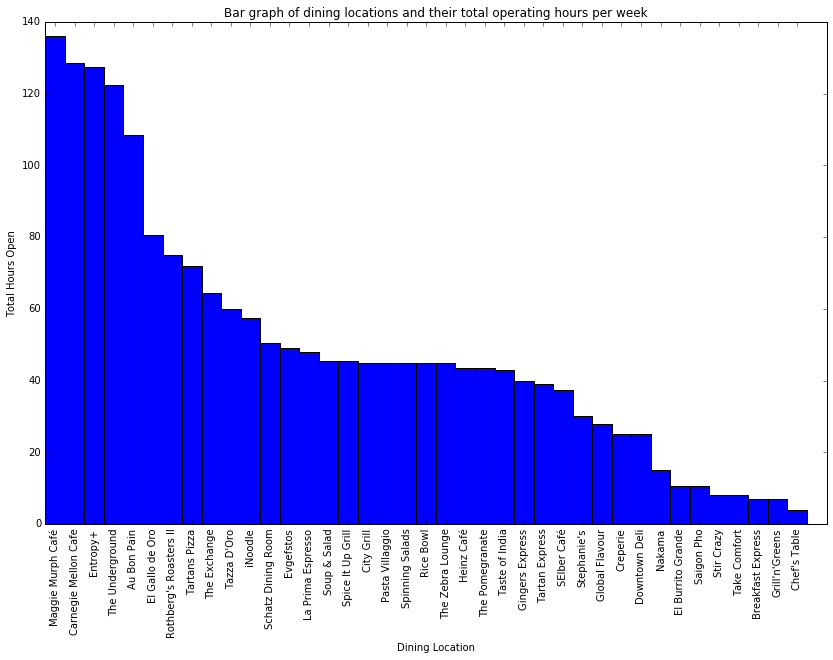

In [8]:
num_eateries = len(dining_data['locations'])
plt.figure(figsize=(14,9))
bar_width = 1.0
plt.bar(np.arange(num_eateries), sorted_hours, bar_width)
plt.title("Bar graph of dining locations and their total operating hours per week")
plt.ylabel("Total Hours Open")
plt.xlabel("Dining Location")
plt.xticks(np.arange(num_eateries) + bar_width/2, sorted_names, rotation = 90)
plt.show()

Let us also calculate the mean and standard deviation of the hours open so that we can gain an even better understanding of the results.

In [9]:
mean_hours = np.mean(sorted_hours)
std_hours = np.std(sorted_hours)
print "mean is: ", mean_hours
print "standard deviation is: ", std_hours

mean is:  49.2435897436
standard deviation is:  34.7627253577


Now the dining API is fairly limited with what you can do with it as it only provides very basic information. So if we wanted to use the data for something complex like plotting the locations of each eatery on the campus map, the dining API would not provide enough information for such a task. However we can always extend the information we have with some external sources. Now in order to tackle the aforementioned task we need gps coordinate data for each dining location which the API sadly does not provide. However after doing a bit of web searching I was able to find CMU's webpage on the dining locations that does contain such data in: http://webapps.studentaffairs.cmu.edu/dining/ConceptInfo/?page=listConcepts. 

We are going to use the library bs4 to help us scrape the html contents of the website.

In [10]:
import bs4

Taking a quick glance at the html source for the website we can notice that both the dining location name and its coordinates are stored within divs of class "conceptBucket". Within a conceptBucket the coordinate data is an attribute value of a button element with and id of "mapIt" while the eatery name is the inner html text of a div with a class of "conceptName".

In [11]:
response = urllib2.urlopen("http://webapps.studentaffairs.cmu.edu/dining/ConceptInfo/?page=listConcepts")
page = bs4.BeautifulSoup(response.read(), 'html.parser') 
eateries_info = page('div', class_="conceptBucket")
eatery_dict = {}

for eatery in eateries_info:
    mapIt = eatery.find('button', id="MapIt")
    coords = [float(x) for x in mapIt['value'].split(",")]
    name = eatery.find('div', class_="conceptName").text
    eatery_dict[name] = coords

print eatery_dict

{u'GINGERS EXPRESS (BAKER)': [40.44128, -79.944618], u'TAKE COMFORT': [40.442532, -79.940001], u'CITY GRILL': [40.443658, -79.942019], u'SAIGON PHO': [40.442522, -79.939985], u'INOODLE': [40.443486, -79.945528], u'PASTA VILLAGGIO': [40.443627, -79.942024], u"GRILL'N'GREENS": [40.442522, -79.939985], u'SPICE IT UP GRILL': [40.44253, -79.940003], u'HEINZ CAF\xc9': [40.444328, -79.94506], u'THE MAGGIE MURPH CAF\xc9': [40.441137, -79.943472], u"ROTHBERG'S ROASTERS II": [40.443, -79.946859], u'FRESH SELECT SOUP & SALAD': [40.442522, -79.939982], u'EL GALLO DE ORO': [40.443152, -79.942049], u'TASTE OF INDIA': [40.442684, -79.940225], u'SEIBER CAF\xc9': [40.446468, -79.950158], u'BREAKFAST EXPRESS': [40.442522, -79.939976], u'THE EXCHANGE': [40.441499, -79.941951], u'ENTROPY+': [40.442923, -79.942103], u'ZEBRA LOUNGE': [40.441633, -79.943015], u'THE UNDERGROUND': [40.44534, -79.943204], u'SPINNING SALADS': [40.443637, -79.942019], u'EVGEFSTOS': [40.4435792, -79.9420455], u'EL BURRITO GRANDE':

We now have successfully scraped the coordinates of the dining locations, however there is still one small problem: the names of the eateries from the webpage differ slightly from that of the dining API. For example in the json object we have "Au Bon Pain" whereas in the cmu website it is listed as "AU BON PAIN AT SKIBO CAFÉ". Therefore adding the coordinate data to the json object is not as trivial as it seems, since we need to match these slightly differing names. Now there are two approaches to solving this problem: first we can manually add in the coordinate data ourselves since we can easily tell which names refer to the same dining location, but of course that would be very inefficient and a terrible use of our time. For the second approach we can use a technique known as "fuzzy matching" which tries to match closely related strings from a pool of possibilities.

The library that we are going to use for fuzzy matching is called fuzzywuzzy and it is very simple to use.

In [12]:
from fuzzywuzzy import process

/home/adi/Documents/datascience/jupyter/local/lib/python2.7/site-packages/fuzzywuzzy/fuzz.py:35: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [13]:
for eatery in dining_data['locations']:
    name = eatery['name']
    match = process.extractOne(name, eatery_dict.keys())
    #match is a tuple of strings, where the first element is the match.
    print name + " : " + match[0]


Carnegie Mellon Cafe : CARNEGIE MELLON CAFÉ
El Gallo de Oro : EL GALLO DE ORO
Entropy+ : ENTROPY+
The Exchange : THE EXCHANGE
Gingers Express : GINGERS EXPRESS (BAKER)
Heinz Café : HEINZ CAFÉ
La Prima Espresso : LA PRIMA ESPRESSO
Maggie Murph Café : THE MAGGIE MURPH CAFÉ
City Grill : CITY GRILL
Pasta Villaggio : PASTA VILLAGGIO
Spinning Salads : SPINNING SALADS
Evgefstos : EVGEFSTOS
Rice Bowl : RICE BOWL
Creperie : CRÊPERIE
Downtown Deli : DOWNTOWN DELI
El Burrito Grande : EL BURRITO GRANDE
Global Flavour : GLOBAL FLAVOUR
Chef's Table : CHEF'S TABLE
Nakama : NAKAMA
Soup & Salad : FRESH SELECT SOUP & SALAD
Spice It Up Grill : SPICE IT UP GRILL
Stir Crazy : STIR CRAZY
Take Comfort : TAKE COMFORT
Taste of India : TASTE OF INDIA
Breakfast Express : BREAKFAST EXPRESS
Schatz Dining Room : SCHATZ DINING ROOM
SEIber Café : SEIBER CAFÉ
Stephanie's : STEPHANIE'S
Tartan Express : TARTAN EXPRESS
The Pomegranate : THE POMEGRANATE
Tartans Pizza : TARTANS PIZZA
Tazza D'Oro : TAZZA D'ORO
The Undergrou

As you can see above the names from the API match up perfectly with the names from CMU's website. Now all we have to do is use the matched names in order to add the coordinate data to our json object.

In [14]:
for eatery in dining_data['locations']:
    name = eatery['name']
    match = process.extractOne(name, eatery_dict.keys())
    eatery['coordinates'] = eatery_dict[match[0]]
for eatery in dining_data['locations']:
    print eatery['name'] + " : ", eatery['coordinates']

Carnegie Mellon Cafe :  [40.442429, -79.9397]
El Gallo de Oro :  [40.443152, -79.942049]
Entropy+ :  [40.442923, -79.942103]
The Exchange :  [40.441499, -79.941951]
Gingers Express :  [40.44128, -79.944618]
Heinz Café :  [40.444328, -79.94506]
La Prima Espresso :  [40.442611, -79.945857]
Maggie Murph Café :  [40.441137, -79.943472]
City Grill :  [40.443658, -79.942019]
Pasta Villaggio :  [40.443627, -79.942024]
Spinning Salads :  [40.443637, -79.942019]
Evgefstos :  [40.4435792, -79.9420455]
Rice Bowl :  [40.443627, -79.942024]
Creperie :  [40.443627, -79.942024]
Downtown Deli :  [40.443657, -79.942061]
El Burrito Grande :  [40.442503, -79.939962]
Global Flavour :  [40.442522, -79.939985]
Chef's Table :  [40.442532, -79.940001]
Nakama :  [40.442527, -79.940075]
Soup & Salad :  [40.442522, -79.939982]
Spice It Up Grill :  [40.44253, -79.940003]
Stir Crazy :  [40.442531, -79.940013]
Take Comfort :  [40.442532, -79.940001]
Taste of India :  [40.442684, -79.940225]
Breakfast Express :  [40

Now since we have the coordinate data for every dining location let's plot the locations on a map. To do this we will use the library folium which provides a very nice abstraction towards using gps coordinates and plotting data on a map.

In [15]:
import folium

In [16]:
CMU_coordinates = [40.443061, -79.943325]
default_zoom = 16

dining_map = folium.Map(location=CMU_coordinates, zoom_start=default_zoom)
for eatery in dining_data['locations']:
    folium.Marker(eatery['coordinates'], popup=eatery['name']).add_to(dining_map)
dining_map

You can also click on each marker and the name of the dining location will display in a popup bubble. We could also use this to map the eateries that are open on weekends.

In [17]:
def isOpenOnWeekend(eatery):
    times = eatery['times']
    weekends = [0,6]
    for time in times:
        start_day = time['start']['day']
        end_day = time['end']['day']
        if (start_day in weekends or end_day in weekends):
            return True
    return False

map_weekends = folium.Map(location=CMU_coordinates, zoom_start = default_zoom)

for eatery in dining_data['locations']:
    if (isOpenOnWeekend(eatery)):
        folium.Marker(eatery['coordinates'], popup=eatery['name']).add_to(map_weekends)
map_weekends     


Now let's take this one step further and add the operating hours information to make the map more informative. We will be using circular markers where the size of each marker denotes how long a dining location is open each week. 

In [18]:
import random

# returns a random int from 0-255
def randHex():
    return random.randint(0,255)

# returns a string of a random rgb color in hex
def randColor():
    return "#{0:02x}{1:02x}{2:02x}".format(randHex(), randHex(), randHex())

max_hours = max([eatery['hours_open'] for eatery in dining_data['locations']])
map_hours = folium.Map(location=CMU_coordinates, zoom_start=default_zoom)
marker_scale = 60

for eatery in dining_data['locations']:
    folium.CircleMarker(location=eatery['coordinates'], radius = int(marker_scale*eatery['hours_open']/max_hours), 
                        popup = eatery['name'], fill_color=randColor()).add_to(map_hours)
    
map_hours
    